In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras as k

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

<Figure size 200x200 with 0 Axes>

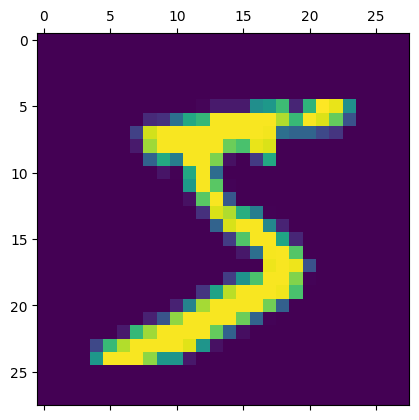

In [9]:
plt.figure(figsize=(2, 2))
plt.matshow(x_train[0])

In [11]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [13]:
x_test_flattened.shape, x_test.shape

((10000, 784), (10000, 28, 28))

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [23]:
model.fit(x_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9129 - loss: 0.3116
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9216 - loss: 0.2814
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9214 - loss: 0.2808
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9244 - loss: 0.2663
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9293 - loss: 0.2554
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9281 - loss: 0.2609
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9308 - loss: 0.2520
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9298 - loss: 0.2519
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9323 - loss: 0.2469
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9331 - loss: 0.2416


In [25]:
model.evaluate(x_test_flattened, y_test)

  1/313 ━━━━━━━━━━━━━━━━━━━━ 1:16 245ms/step - accuracy: 0.9688 - loss: 0.3102

C:\Users\muham\AppData\Local\anaconda3\envs\myenv_ver_3_12_4\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9173 - loss: 0.2983


[0.2637229859828949, 0.9280999898910522]

In [27]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([3.0379915e-03, 1.5347293e-08, 1.3710404e-02, 9.6503407e-01,
       1.6062165e-03, 1.7213105e-01, 2.4329548e-08, 9.9988657e-01,
       1.0339591e-01, 6.9185603e-01], dtype=float32)

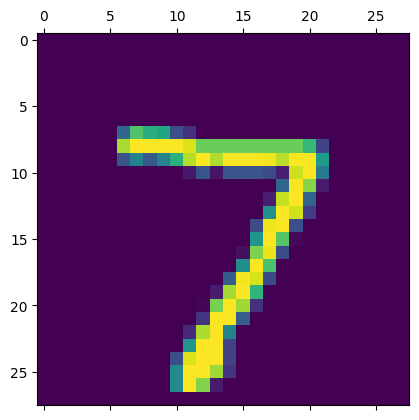

In [29]:
plt.matshow(x_test[0])

In [31]:
np.argmax(y_predicted[0])

7

In [33]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [35]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    7,    6,    3,    1,    0],
       [   0, 1113,    3,    1,    0,    1,    4,    2,   11,    0],
       [   4,   10,  930,   15,    7,    4,   12,   10,   37,    3],
       [   2,    0,   18,  919,    0,   25,    2,   12,   26,    6],
       [   1,    1,    5,    2,  919,    0,   10,    4,   11,   29],
       [   7,    2,    2,   34,   10,  775,   15,    8,   34,    5],
       [  11,    3,    9,    1,    7,   13,  911,    1,    2,    0],
       [   1,    6,   23,    6,    5,    1,    0,  958,    4,   24],
       [   5,    9,    6,   19,    9,   18,    9,   12,  880,    7],
       [   9,    7,    1,    8,   27,    7,    0,   24,   10,  916]])>

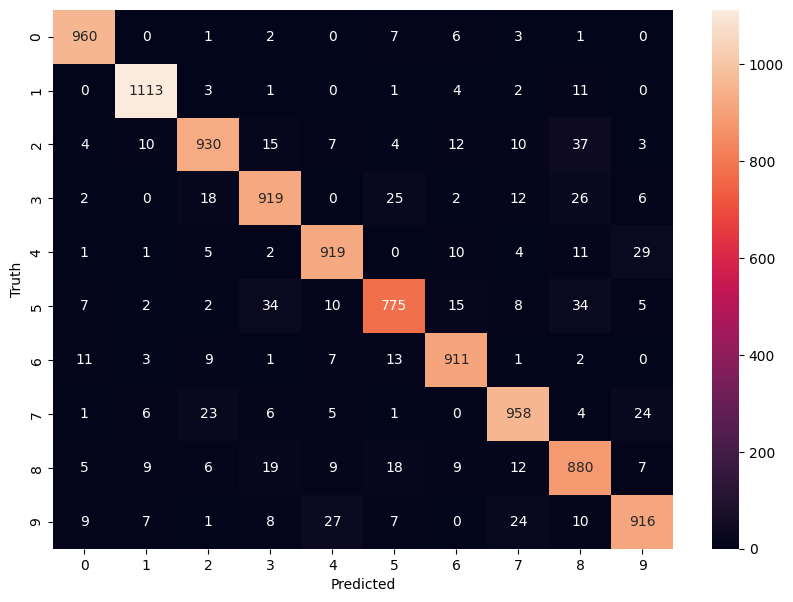

In [37]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel("Truth")
plt.show()

# Using hidden layer

In [40]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [42]:
model.fit(x_train_flattened, y_train, epochs=10)

Epoch 1/10


C:\Users\muham\AppData\Local\anaconda3\envs\myenv_ver_3_12_4\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8672 - loss: 0.4596
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9623 - loss: 0.1276
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9740 - loss: 0.0865
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9814 - loss: 0.0626
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9847 - loss: 0.0502
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9879 - loss: 0.0387
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9903 - loss: 0.0308
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9921 - loss: 0.0244
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9937 - loss: 0.0216
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9944 - loss: 0.0178


In [44]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9717 - loss: 0.1032


[0.08744317293167114, 0.9761000275611877]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

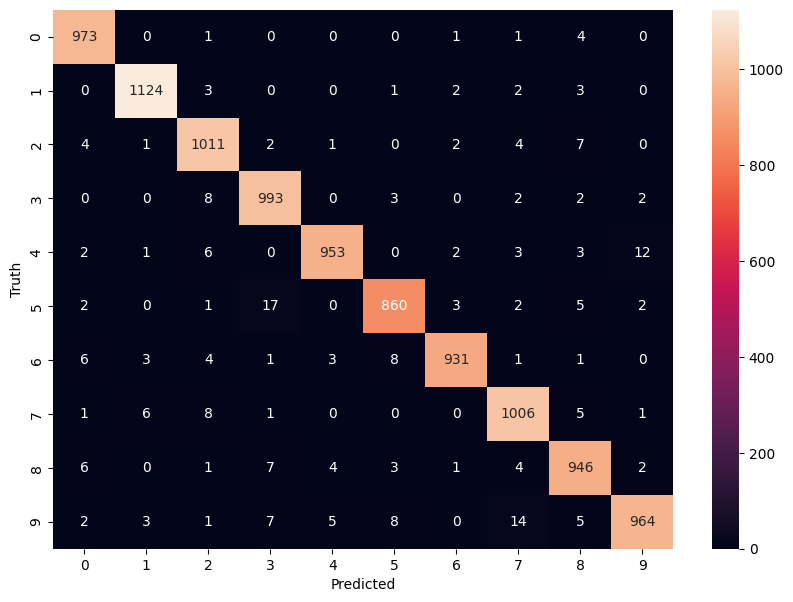

In [50]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Flatten layer so that we don't have to call .reshape on input dataset

In [56]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [58]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10


C:\Users\muham\AppData\Local\anaconda3\envs\myenv_ver_3_12_4\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8550 - loss: 0.4894
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9577 - loss: 0.1474
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9677 - loss: 0.1059
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9744 - loss: 0.0844
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9776 - loss: 0.0702
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9815 - loss: 0.0614
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9825 - loss: 0.0547
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9853 - loss: 0.0453
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9855 - loss: 0.0460
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9872 - loss: 0.0390


In [61]:
model.evaluate(x_test, y_test)

  1/313 ━━━━━━━━━━━━━━━━━━━━ 1:23 269ms/step - accuracy: 1.0000 - loss: 0.0236

C:\Users\muham\AppData\Local\anaconda3\envs\myenv_ver_3_12_4\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9784 - loss: 0.0792


[0.06567276269197464, 0.9810000061988831]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

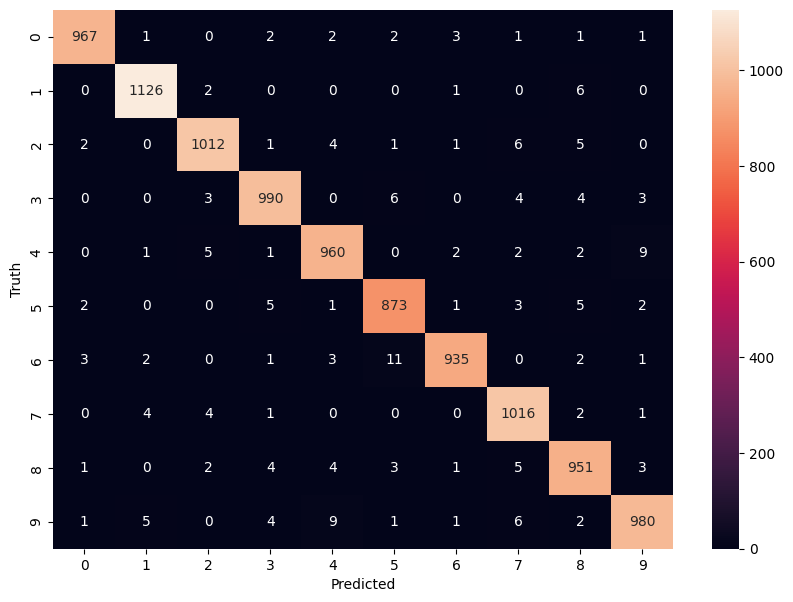

In [65]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')